**<span style="color:white">Intoduction to Statistical Inference</span>**  
**<span style="color:grey">Homework #03</span>** 

**<span style="color:blue">Erfan Panahi - 810103084</span>**  

# **<span style="color:red">Problem 3.</span>**  

### **<span style="color:green">Required Packages</span>**  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### **<span style="color:green">Define parameters</span>**  

In [2]:
c = np.arange(0, 1.51, 0.01)
alpha = 3/2 * (2/3 - c)
beta = 9/4 * c**2
power = 1 - beta

### **<span style="color:green">Results</span>**  

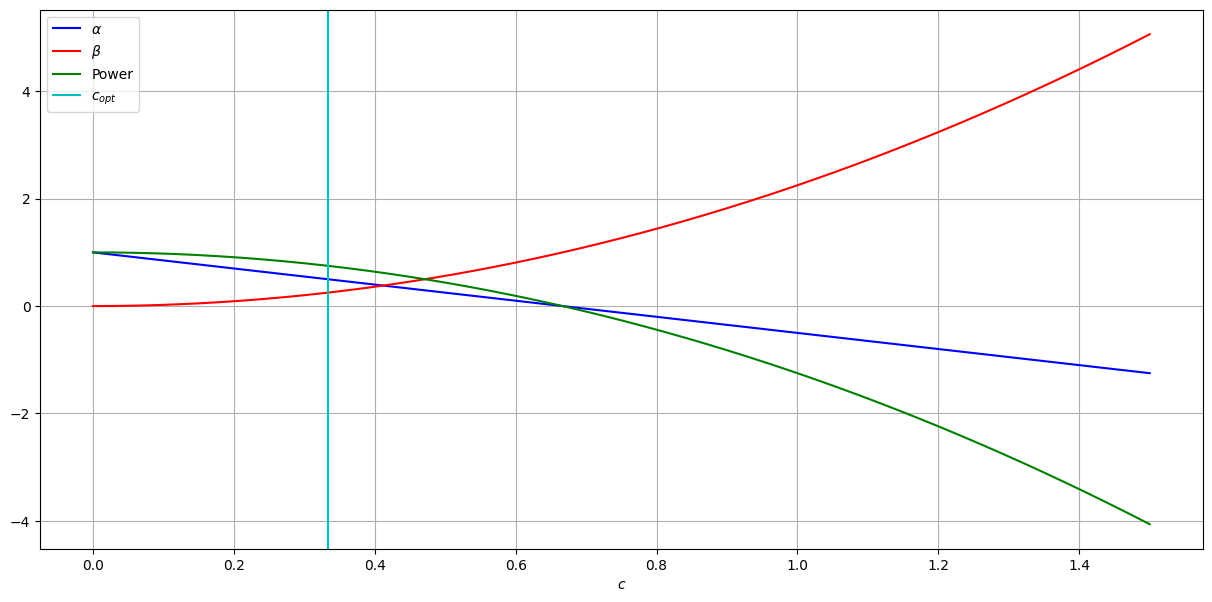

In [11]:
plt.figure(figsize = (15,7))
plt.plot(c, alpha, 'b', label='$\\alpha$')
plt.plot(c, beta, 'r', label='$\\beta$')
plt.plot(c, power, 'g', label='Power')
plt.axvline(x=1/3, color='c', linestyle='-', label='$c_{opt}$')

plt.legend(loc='best')
plt.xlabel('$c$')
plt.grid(True)
plt.show()

# **<span style="color:red">Problem 10.</span>**  

### **<span style="color:green">Required Packages</span>**  

In [12]:
import numpy as np 
import scipy.stats as stats

### **<span style="color:green">Define parameters</span>**  

In [13]:
mu = 2 
sigma = 0.5  
sample_size = 12  
num_samples = 100  
alpha = 0.05  

### **<span style="color:green">Functions</span>**  

In [14]:
def compute_confidence_intervals(sample, sigma_known):
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)
    se = s / np.sqrt(len(sample))
    
    ci_known_sigma = (x_bar - stats.norm.ppf(1-alpha/2) * sigma_known / np.sqrt(len(sample)),
                      x_bar + stats.norm.ppf(1-alpha/2) * sigma_known / np.sqrt(len(sample)))
    ci_unknown_sigma_Z = (x_bar - stats.norm.ppf(1-alpha/2) * se,
                          x_bar + stats.norm.ppf(1-alpha/2) * se)
    ci_unknown_sigma_T = (x_bar - stats.t.ppf(1-alpha/2, df=len(sample)-1) * se,
                          x_bar + stats.t.ppf(1-alpha/2, df=len(sample)-1) * se)
    
    return ci_known_sigma, ci_unknown_sigma_Z, ci_unknown_sigma_T

def coverage(ci_array, true_mean):
    return np.mean((ci_array[:, 0] <= true_mean) & (ci_array[:, 1] >= true_mean))

### **<span style="color:green">Results</span>**  

In [15]:
known_sigma_CI = np.zeros((num_samples, 2))
unknown_sigma_Z_CI = np.zeros((num_samples, 2))
unknown_sigma_T_CI = np.zeros((num_samples, 2))

for i in range(num_samples):
    sample = np.random.normal(mu, sigma, sample_size)
    known_sigma_CI[i], unknown_sigma_Z_CI[i], unknown_sigma_T_CI[i] = compute_confidence_intervals(sample, sigma)

coverage_known_sigma = coverage(known_sigma_CI, mu)
coverage_unknown_sigma_Z = coverage(unknown_sigma_Z_CI, mu)
coverage_unknown_sigma_T = coverage(unknown_sigma_T_CI, mu)

print(f"True mean is in {coverage_known_sigma*100:.2f}% of CIs in known-sigma scenario for Z-distribution")
print(f"True mean is in {coverage_unknown_sigma_Z*100:.2f}% of CIs in unknown-sigma scenario for Z-distribution")
print(f"True mean is in {coverage_unknown_sigma_T*100:.2f}% of CIs in unknown-sigma scenario for T-distribution")

print(f"CIs in known-sigma scenario for Z-distribution on average are: {np.mean(known_sigma_CI, axis=0)}")
print(f"CIs in unknown-sigma scenario for Z-distribution on average are: {np.mean(unknown_sigma_Z_CI, axis=0)}")
print(f"CIs in unknown-sigma scenario for T-distribution on average are: {np.mean(unknown_sigma_T_CI, axis=0)}")

if np.mean(unknown_sigma_Z_CI[:, 1] - unknown_sigma_Z_CI[:, 0]) < np.mean(unknown_sigma_T_CI[:, 1] - unknown_sigma_T_CI[:, 0]):
    print("Confidence intervals constructed with the Z-distribution using s instead of σ are narrower than those using the T-distribution.")
else:
    print("Confidence intervals constructed with the T-distribution using s are narrower than those using the Z-distribution.")


True mean is in 99.00% of CIs in known-sigma scenario for Z-distribution
True mean is in 98.00% of CIs in unknown-sigma scenario for Z-distribution
True mean is in 99.00% of CIs in unknown-sigma scenario for T-distribution
CIs in known-sigma scenario for Z-distribution on average are: [1.70277916 2.26857203]
CIs in unknown-sigma scenario for Z-distribution on average are: [1.71586482 2.25548637]
CIs in unknown-sigma scenario for T-distribution on average are: [1.68268559 2.28866561]
Confidence intervals constructed with the Z-distribution using s instead of σ are narrower than those using the T-distribution.
